In [1]:
event1 = """
Tree Plantation by TCS

This is a reminder for Mega Tree Plantation Drive on Sunday, 8th July 2018 @ 8.30 am.
Please join us with your friends, family, and colleagues. 
You can register for the event on the link given below:
https://docs.google.com/.../1FAIpQLSchpWOp53R.../viewform...
Reporting Venue: 
Main gate of Automotive Research Association of India (ARAI) Company 
ARAI Hill, Kothrud 
Landmark: Near Paud Fata, Lane opposite to TVS showroom goes straight to ARAI hill.
Google Map Location: https://goo.gl/maps/wcK6ZXKx4o62
Names and Contact Numbers of Volunteers:
1. Ravi Phadke – 9673459667
2. Prashant – 9922229471
3. Himanshu - 8698590691
4. Neeraj - 70383 25622
5. Sameer - 7038325622
6. Hrushabh – 7219070101
Notes:
1. Please bring some equipment for digging the pits since we have limited equipments for large number of volunteers.
2. Canteen facility is NOT available nearby. So please keep stock of food and drinking water.
3. Wear Sports shoes preferably.
4. Keep appropriate provision for safety from rain.
5. Mobile network at the venue is not sufficiently available. In case of difficulty try calling from multiple numbers.
6. The event is completely volunteer based. No organization is associated with this event. Since the plantation activity is to be done in forest area, please participate on your own risk. Please take proper safety measures towards yourself and your kids/friends.
Thank you.
"""

event2 = """
Van Utsav

Tree Plantation Day
Date: – 22nd July 2019

Tree Plantation activity was conducted on 22nd July 2019 as per SPPU circular. 
The main aim of this activity was to plant native trees and makes green and sustainable campus which is 
free from pollution. Around 120 Trees were planted in the campus premises. Species like Neem, Gulmohar, 
Palas, Tamarind were planted.
"""


event3 = """
Yi Pune Tree Plantation Drive

Yi Pune, begin our 75 at 75 initiative for 2022 with plantation of 75 trees and making it a full-blown Miyawaki forest soon.

So as a part of Yi climate change activities of 2021, I would love to invite everyone on 15th August, 830 am at Panchavati Vanikaran Park, Pashan, Pune for the plantation along with refreshments.

We are sure you all will enjoy planting a tree. Get your friends and family members too.

We will teach and help you to plant as well, as we want all of you to feel nature so get ready to let your hands a little muddy!

LOCATION
Panchavati Vanikaran Park
Panchawati Road
Pune, Maharashtra, India

SEE ROUTE


Leaflet | © Mapbox © OpenStreetMap
CONTACT US
For additional event or venue information, please email vishal.lall@cii.in
You can also reach us at +918850344676
"""

events = [event1, event2, event3]


In [2]:
# !pip install gensim

In [3]:
from scipy import spatial
import gensim.downloader as api
import numpy as np
import string

model = api.load("glove-wiki-gigaword-50") #choose from multiple models https://github.com/RaRe-Technologies/gensim-data

s0 = 'Mark zuckerberg owns the facebook company'
s1 = 'Facebook company ceo is mark zuckerberg'
s2 = 'Microsoft is owned by Bill gates'
s3 = 'How to learn japanese'

def preprocess(s):
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = s.replace('\n', ' ')
    return [i.lower() for i in s.split()]

def get_vector(s):
    arr = []
    for i in preprocess(s):
        try:
            arr.append(model[i])
        except KeyError:
            continue
    return np.sum(np.array(arr), axis=0)

def get_similarity(s1, s2):
    return spatial.distance.cosine(get_vector(s0), get_vector(s1))


def show_similar_events(event):
    count_matching_events = 0
    highest_match = 0
    matched_event = None
    for i in events:
        sim = get_similarity(event, i)
        if sim > 0.2:
            count_matching_events += 1
            if sim > highest_match:
                highest_match = sim
                matched_event = i
    return count_matching_events, matched_event


# print('s0 vs s1 ->',1 - spatial.distance.cosine(get_vector(s0), get_vector(s1)))
# print('s0 vs s2 ->', 1 - spatial.distance.cosine(get_vector(s0), get_vector(s2)))
# print('s0 vs s3 ->', 1 - spatial.distance.cosine(get_vector(s0), get_vector(s3)))

In [4]:
# !pip install plotly

In [11]:
event = """
Tree plantation drive

Pune Tree plantation
Near Balewadi Phata
Date: 25th Oct 2022
Time: 10 am onwards

Please bring shoes, water and raincoat
"""

matched_count, matched_event = show_similar_events(event)
print(f"Matched {matched_count} events")
print("Best Match")
print(matched_event)

Matched 3 events
Best Match

Tree Plantation by TCS

This is a reminder for Mega Tree Plantation Drive on Sunday, 8th July 2018 @ 8.30 am.
Please join us with your friends, family, and colleagues. 
You can register for the event on the link given below:
https://docs.google.com/.../1FAIpQLSchpWOp53R.../viewform...
Reporting Venue: 
Main gate of Automotive Research Association of India (ARAI) Company 
ARAI Hill, Kothrud 
Landmark: Near Paud Fata, Lane opposite to TVS showroom goes straight to ARAI hill.
Google Map Location: https://goo.gl/maps/wcK6ZXKx4o62
Names and Contact Numbers of Volunteers:
1. Ravi Phadke – 9673459667
2. Prashant – 9922229471
3. Himanshu - 8698590691
4. Neeraj - 70383 25622
5. Sameer - 7038325622
6. Hrushabh – 7219070101
Notes:
1. Please bring some equipment for digging the pits since we have limited equipments for large number of volunteers.
2. Canteen facility is NOT available nearby. So please keep stock of food and drinking water.
3. Wear Sports shoes preferabl

In [7]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('Pitchers.csv')

<AxesSubplot:>

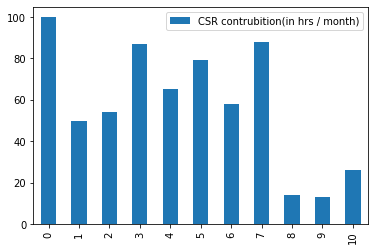

In [8]:
df.plot.bar()

In [9]:
df

,Company Name,CSR contrubition(in hrs / month)
0,TCS,100
1,Infosys,50
2,Capgemini,54
3,Xoriant,87
4,Persistent Systems,65
5,Microsoft,79
6,VmWare,58
7,Nutanix,88
8,Citi Bank,14
9,MasterCard,13


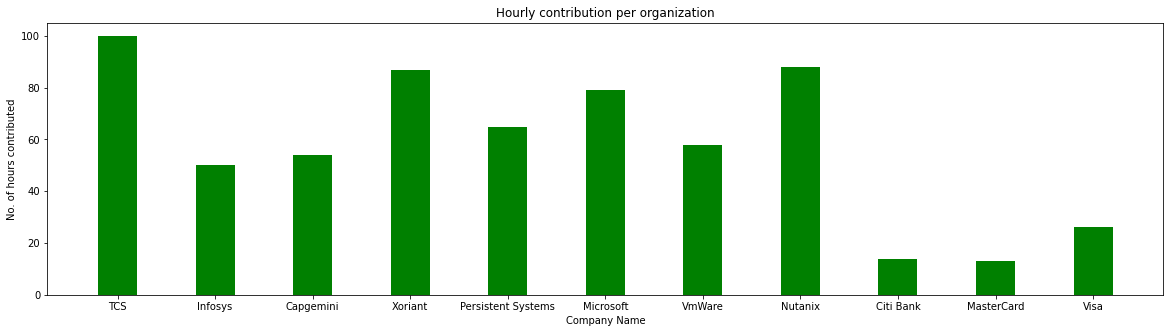

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
courses = df['Company Name']
values = df['CSR contrubition(in hrs / month)']
  
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Company Name")
plt.ylabel("No. of hours contributed")
plt.title("Hourly contribution per organization")
plt.show()